In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt

In [2]:
df = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Test_set.xlsx')
sam_sub = pd.read_excel('Sample_submission.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.dropna(inplace =  True)

In [6]:
big_df=df.append(test,sort=False)

In [7]:
df['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → IXA → BLR                   1
BOM → COK → MAA → HYD             1
BOM → JDH → JAI → DEL → HYD       1
BOM → JAI → DEL → HYD             1
CCU → VTZ → BLR                   1
Name: Route, Length: 128, dtype: int64

In [8]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

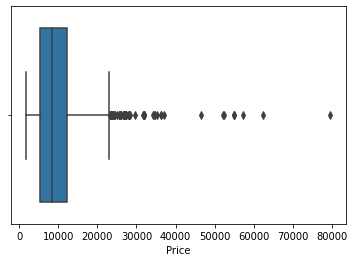

In [9]:
sns.boxplot(df['Price'])

In [10]:
df[df['Price'] > 50000]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
657,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,52229
1478,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826
2618,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
5439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,16:55,23:00,6h 5m,1 stop,No info,54826
9715,Jet Airways Business,6/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No info,52285
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209


In [11]:
df.groupby(['Airline', 'Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

In [12]:
df.groupby(['Airline', 'Additional_Info'])['Price'].mean()

Airline                            Additional_Info             
Air Asia                           No info                          5573.647799
                                   Red-eye flight                  10873.000000
Air India                          1 Long layover                  13825.666667
                                   1 Short layover                 26743.000000
                                   2 Long layover                  26480.000000
                                   Change airports                 16800.714286
                                   No info                          9549.296659
GoAir                              No info                          5861.056701
IndiGo                             No Info                          8044.666667
                                   No info                          5670.213171
Jet Airways                        1 Long layover                  27448.750000
                                   Business class       

In [13]:
df.groupby(['Airline', 'Additional_Info', 'Total_Stops'])['Price'].mean()

Airline                            Additional_Info               Total_Stops
Air Asia                           No info                       1 stop          7078.325581
                                                                 2 stops         6341.888889
                                                                 non-stop        4456.883333
                                   Red-eye flight                non-stop       10873.000000
Air India                          1 Long layover                1 stop         13825.666667
                                   1 Short layover               2 stops        26743.000000
                                   2 Long layover                2 stops        26480.000000
                                   Change airports               1 stop         20198.500000
                                                                 2 stops        14880.500000
                                                                 4 stops        17686.

In [14]:
df.groupby(['Airline', 'Source', 'Destination'])['Price'].mean()

Airline                            Source    Destination
Air Asia                           Banglore  Delhi           4265.577465
                                             New Delhi       5791.944444
                                   Delhi     Cochin          7804.175000
                                   Kolkata   Banglore        5012.320000
Air India                          Banglore  Delhi           6045.166667
                                             New Delhi      11045.575472
                                   Chennai   Kolkata         5895.640000
                                   Delhi     Cochin         10003.446381
                                   Kolkata   Banglore       10357.324219
                                   Mumbai    Hyderabad       6260.051471
GoAir                              Banglore  Delhi           4050.289855
                                             New Delhi       7532.333333
                                   Delhi     Cochin          6587.1

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='count'>

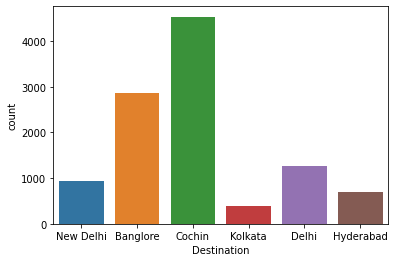

In [16]:
sns.countplot(df['Destination']) 

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


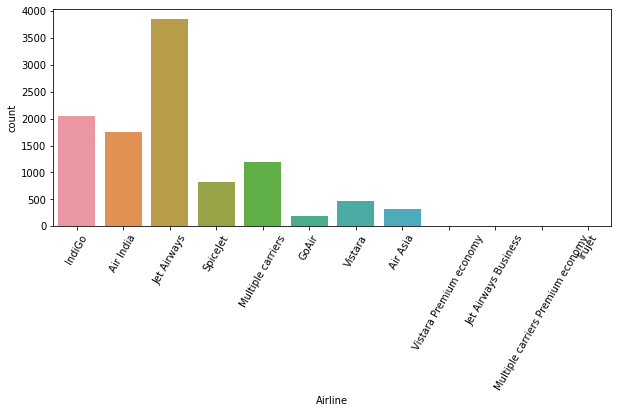

In [17]:
plt.figure(figsize = (10,4))
sns.countplot(df['Airline']) 
plt.xticks(rotation = 60)
plt.show()

In [18]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [19]:
df['Month'] = df['Date_of_Journey'].apply(lambda x: x.strftime('%B'))

In [20]:
df['Day'] = df['Date_of_Journey'].apply(lambda x: x.strftime('%d'))

In [21]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,March,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,January,05
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,September,06
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,December,05
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,January,03


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='count'>

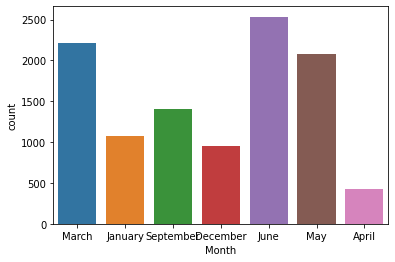

In [22]:
sns.countplot(df['Month'])

In [27]:
big_df['Date']=big_df['Date_of_Journey'].str.split('/').str[0]
big_df['Month']=big_df['Date_of_Journey'].str.split('/').str[1]

In [29]:
big_df['Date']=big_df['Date'].astype(int)
big_df['Month']=big_df['Month'].astype(int)
big_df['Year']=big_df['Year'].astype(int)

In [30]:
big_df=big_df.drop(['Date_of_Journey'],axis=1)

In [31]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [32]:
big_df['Arrival_Time']=big_df['Arrival_Time'].str.split(' ').str[0]

In [33]:
big_df['Total_Stops']=big_df['Total_Stops'].replace('non-stop','0 stop')

In [34]:
big_df['Stop'] = big_df['Total_Stops'].str.split(' ').str[0]

In [35]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [36]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13353 non-null  object 
 5   Arrival_Time     13353 non-null  object 
 6   Duration         13353 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13353 non-null  object 
 9   Price            10682 non-null  float64
 10  Date             13353 non-null  int32  
 11  Month            13353 non-null  int32  
 12  Year             13353 non-null  int32  
 13  Stop             13353 non-null  object 
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [37]:
big_df['Stop']=big_df['Stop'].astype(int)
big_df=big_df.drop(['Total_Stops'],axis=1)

In [38]:
big_df['Arrival_Hour'] = big_df['Arrival_Time'] .str.split(':').str[0]
big_df['Arrival_Minute'] = big_df['Arrival_Time'] .str.split(':').str[1]

In [39]:
big_df['Arrival_Hour']=big_df['Arrival_Hour'].astype(int)
big_df['Arrival_Minute']=big_df['Arrival_Minute'].astype(int)
big_df=big_df.drop(['Arrival_Time'],axis=1)

In [40]:
big_df['Departure_Hour'] = big_df['Dep_Time'] .str.split(':').str[0]
big_df['Departure_Minute'] = big_df['Dep_Time'] .str.split(':').str[1]

In [41]:
big_df['Departure_Hour']=big_df['Departure_Hour'].astype(int)
big_df['Departure_Minute']=big_df['Departure_Minute'].astype(int)
big_df=big_df.drop(['Dep_Time'],axis=1)

In [42]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


In [43]:
big_df['Route_1']=big_df['Route'].str.split('→ ').str[0]
big_df['Route_2']=big_df['Route'].str.split('→ ').str[1]
big_df['Route_3']=big_df['Route'].str.split('→ ').str[2]
big_df['Route_4']=big_df['Route'].str.split('→ ').str[3]
big_df['Route_5']=big_df['Route'].str.split('→ ').str[4]

In [44]:
big_df['Price'].fillna((big_df['Price'].mean()),inplace=True)

In [45]:
big_df['Route_1'].fillna("None",inplace=True)
big_df['Route_2'].fillna("None",inplace=True)
big_df['Route_3'].fillna("None",inplace=True)
big_df['Route_4'].fillna("None",inplace=True)
big_df['Route_5'].fillna("None",inplace=True)

In [46]:

big_df=big_df.drop(['Route'],axis=1)
big_df=big_df.drop(['Duration'],axis=1)

In [47]:
big_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [48]:
big_df.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
big_df["Airline"]=encoder.fit_transform(big_df['Airline'])
big_df["Source"]=encoder.fit_transform(big_df['Source'])
big_df["Destination"]=encoder.fit_transform(big_df['Destination'])
big_df["Additional_Info"]=encoder.fit_transform(big_df['Additional_Info'])
big_df["Route_1"]=encoder.fit_transform(big_df['Route_1'])
big_df["Route_2"]=encoder.fit_transform(big_df['Route_2'])
big_df["Route_3"]=encoder.fit_transform(big_df['Route_3'])
big_df["Route_4"]=encoder.fit_transform(big_df['Route_4'])
big_df["Route_5"]=encoder.fit_transform(big_df['Route_5'])

In [50]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [51]:
df_train=big_df[0:10682]
df_test=big_df[10682:]

In [52]:
X=df_train.drop(['Price'],axis=1)
y=df_train.Price

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [55]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [56]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [57]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [58]:
selected_features=X_train.columns[(model.get_support())]

In [59]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [63]:

from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [64]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [65]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [74]:
# Random search of parameters, using 3 fold cross validation, 
# search across 30 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [72]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   3.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   3.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   6.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   6.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=30, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [73]:
y_pred=rf_random.predict(X_test)

In [87]:
import pickle
file = open('flight_rf.pkl', 'wb')
pickle.dump(rf_random, file)

In [88]:
model = open('flight_rf.pkl', 'rb')
forest = pickle.load(model)

In [85]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8719080334704217

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

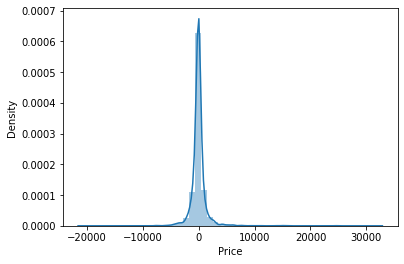

In [84]:
sns.distplot(y_test-y_pred)

In [93]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(X,y)

ExtraTreesRegressor()

In [94]:
print(et.feature_importances_)

[0.1344051  0.0104702  0.01871674 0.05993951 0.13084103 0.04827925
 0.         0.18388507 0.02771813 0.01832453 0.02814033 0.0249148
 0.01750911 0.06092333 0.20498586 0.03045125 0.00049574]


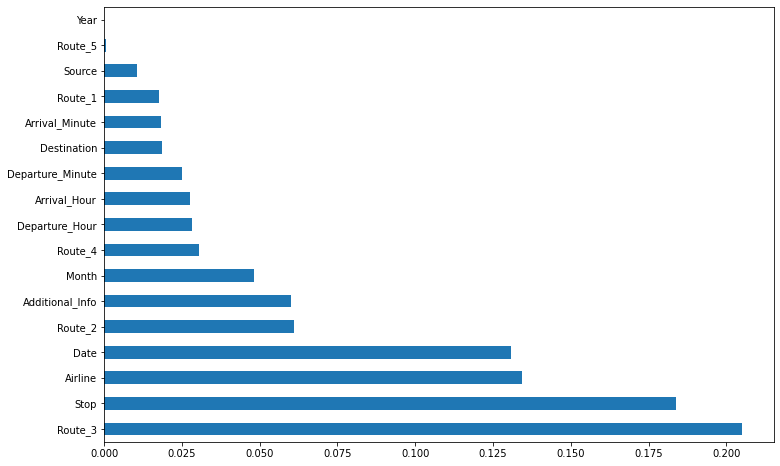

In [97]:
plt.figure(figsize = (12,8))
feat_imp = pd.Series(et.feature_importances_, index = X.columns)
feat_imp.nlargest(20).plot(kind = 'barh')
plt.show()